In [354]:
# Import necessary packages
import pandas as pd
import spacy
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score, f1_score, classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb



# import nltk
# from nltk.corpus import stopwords
# from sklearn.tree import DecisionTreeClassifier
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline
# from sklearn.inspection import DecisionBoundaryDisplay
# import seaborn as sns
# from sklearn.calibration import CalibratedClassifierCV

In [355]:
# Open the file for reading
with open("./datasets/twitter-2013dev-A.txt", "r") as file:
    # Read the lines of the file
    lines = file.readlines()

file.close()

In [356]:
# Open the file for reading
with open("./datasets/twitter-2013test-A.txt", "r") as file:
    # Read the lines of the file
    lines2 = file.readlines()

file.close()

In [357]:
# Open the file for reading
with open("./datasets/twitter-2013train-A.txt", "r") as file:
    # Read the lines of the file
    lines3 = file.readlines()

file.close()

In [358]:
data = []
# Process each line and split it into columns
for line in lines:
    columns = line.strip().split('\t')
    if len(columns) == 3:  # Ensure there are three columns
        data.append({'ID': columns[0], 'Sentiment': columns[1], 'Text': columns[2]})

for line in lines2:
    columns = line.strip().split('\t')
    if len(columns) == 3:  # Ensure there are three columns
        data.append({'ID': columns[0], 'Sentiment': columns[1], 'Text': columns[2]})

for line in lines3:
    columns = line.strip().split('\t')
    if len(columns) == 3:  # Ensure there are three columns
        data.append({'ID': columns[0], 'Sentiment': columns[1], 'Text': columns[2]})
        
# Create a DataFrame from the processed data
df = pd.DataFrame(data)


In [359]:
# Print the last few rows to verify
df.tail()

,ID,Sentiment,Text
14880,103158179306807296,positive,RT @MNFootNg It's monday and Monday Night Foot...
14881,103157324096618497,positive,All I know is the road for that Lomardi start ...
14882,100259220338905089,neutral,"""All Blue and White fam, we r meeting at Golde..."
14883,104230318525001729,positive,@DariusButler28 Have a great game agaist Tam...
14884,100461938533863424,negative,"""I'm pisseeedddd that I missed Kid Cudi's show..."


In [360]:
# Add data with "positive" sentiment
file_paths = [
   "./datasets/twitter-2016devtest-A.txt",
]

positive = []

# Process the file
for file_path in file_paths:
    with open(file_path, "r") as file:
        lines = file.readlines()

    for line in lines:
        columns = line.strip().split('\t')
        if len(columns) == 3 and columns[1] == "positive":  # Check for "negative" sentiment
            positive.append({'ID': columns[0], 'Sentiment': columns[1], 'Text': columns[2]})

# Create a DataFrame from the processed data
positive_df = pd.DataFrame(positive)

# Display the DataFrame
positive_df

,ID,Sentiment,Text
0,637708370129125377,positive,Finally I get my ps4 back I sent it to Sony ca...
1,638141885022736385,positive,the only thing crazier than last-gen was 6th-g...
2,638159273072062464,positive,When you remember Sony is trying to make bible...
3,638175116145377280,positive,@InfinityInq Everyone is playing 3.0 and I'm j...
4,638198267013169153,positive,Albert Shum and I won 3rd in a SONY design com...
...,...,...,...
989,636980439622684672,positive,"Mourinho, Zlatan, Serie A - who are the winner..."
990,637623077304668160,positive,Zlatan wears sunglasses so his eyes do not har...
991,637735358126555136,positive,@rhysllew26 I reckon we'll get him next season...
992,638018562334916609,positive,Wonder if Zlatan will be a United player come ...


In [361]:
# Add data sentiment
file_paths = [

    "./datasets/twitter-2016dev-A.txt",
]

trial = []

# Process each file
for file_path in file_paths:
    with open(file_path, "r") as file:
        lines = file.readlines()

    for line in lines:
        columns = line.strip().split('\t')
        if len(columns) == 3 :  # Check for "negative" sentiment
            trial.append({'ID': columns[0], 'Sentiment': columns[1], 'Text': columns[2]})

# Create a DataFrame from the processed data
trial_df = pd.DataFrame(trial)

# Display the DataFrame
trial_df['Sentiment'].value_counts()

Sentiment
positive    843
neutral     765
negative    391
Name: count, dtype: int64

In [362]:
# Add data with "negative" sentiment
file_paths = [
    "./datasets/twitter-2014test-A.txt",
    "./datasets/twitter-2015test-A.txt",
    "./datasets/twitter-2015train-A.txt",
    "./datasets/twitter-2016test-A.txt",
    "./datasets/twitter-2016train-A.txt", # newly added dataset
]

negative = []

# Process each file
for file_path in file_paths:
    with open(file_path, "r") as file:
        lines = file.readlines()

    for line in lines:
        columns = line.strip().split('\t')
        if len(columns) == 3 and columns[1] == "negative":  # Check for "negative" sentiment
            negative.append({'ID': columns[0], 'Sentiment': columns[1], 'Text': columns[2]})

# Create a DataFrame from the processed data
negative_df = pd.DataFrame(negative)

# Display the DataFrame
negative_df

,ID,Sentiment,Text
0,220880422320603137,negative,"""@MacMiller hate my life, because i can't see ..."
1,266350263764393985,negative,Impulsively bought Resident Evil: Operation Ra...
2,223365454452891649,negative,"""Your plans of attending the Great Yorkshire S..."
3,221521873408765955,negative,@nurinqistinaa @hannahban4na That's the 1st.2n...
4,212368940607873025,negative,"""I wasn't around for Hot Jam, why is it even o..."
...,...,...,...
4720,628968320851660800,negative,@bestdittyvideos ok so someone on Twitter said...
4721,628986193049481216,negative,"today is the day ""harry styles will die at met..."
4722,630421104889319424,negative,@Harry_Styles still upset you didn't tweet abo...
4723,637340624031604736,negative,REALLY??? why couldn't you have them open Pitt...


In [363]:
# Concat three DataFrames
df = pd.concat([df, positive_df], axis=0)
df = pd.concat([df, negative_df], axis=0)
df = pd.concat([df, trial_df], axis=0)

# Shows almost equal data per category
df['Sentiment'].value_counts()

Sentiment
neutral     7603
positive    7527
negative    7473
Name: count, dtype: int64

In [364]:
# Load spaCy's English tokenizer and stop words
nlp = spacy.load("en_core_web_sm")

# Text preprocessing using spaCy
def preprocess_text(text):
    doc = nlp(text)
    #tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    #return ' '.join(tokens)
    tokens = [token.lemma_ for token in doc if (token.text.lower() == "not" or (not token.is_stop and token.is_alpha))]
    return ' '.join(tokens)


# Preprocess the text
df['Processed_Text'] = df['Text'].apply(preprocess_text)

In [365]:
# Check if pre-processing worked
df.head()

,ID,Sentiment,Text,Processed_Text
0,260097528899452929,neutral,Won the match #getin . Plus\u002c tomorrow is ...,won match getin tomorrow busy Awareness debate...
1,263791921753882624,neutral,Some areas of New England could see the first ...,area New England flake season Tuesday
2,264194578381410304,negative,@francesco_con40 2nd worst QB. DEFINITELY Tony...,bad QB DEFINITELY Tony Romo man like share bal...
3,264041328420204544,neutral,#Thailand Washington - US President Barack Oba...,Thailand Washington President Barack Obama vow...
4,263816256640126976,neutral,Did y\u2019all hear what Tony Romo dressed up ...,hear Tony Romo dress Halloween Giants quaterba...


In [366]:
# Define labels mapping
labels = {"neutral": 0, "positive": 1, "negative": 2}

# Map sentiment labels to numerical values
df["Sentiment"] = df["Sentiment"].map(labels)
df["Sentiment"].value_counts()

Sentiment
0    7603
1    7527
2    7473
Name: count, dtype: int64

In [367]:
# Split data into features (x) and target (y)
x = df['Processed_Text']
y = df['Sentiment']

In [368]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
x = tfidf_vectorizer.fit_transform(x)

In [369]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=77)


In [370]:
# Create a classifier using chosen model algorithm
#model = LogisticRegression(random_state=77, solver='lbfgs', max_iter=1000)  
#model = SGDClassifier(random_state=77) # Use SGDClassifier
model = SVC(kernel="rbf", gamma=0.5, C=1.0, random_state=77)
#model = xgb.XGBClassifier(random_state=77)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

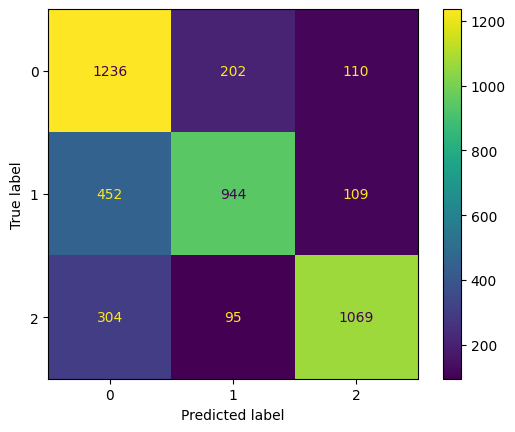

In [371]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [372]:
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.62      0.80      0.70      1548
           1       0.76      0.63      0.69      1505
           2       0.83      0.73      0.78      1468

    accuracy                           0.72      4521
   macro avg       0.74      0.72      0.72      4521
weighted avg       0.74      0.72      0.72      4521



In [373]:
# Calculate evaluation metrics
f1_original = f1_score(y_test, y_pred, average='macro')  # Use weighted average for multiclass classification
accuracy_original = accuracy_score(y_test, y_pred)
recall_original = recall_score(y_test, y_pred, average='macro')  

# Print evaluation metrics
print("Original Model F1 Score:", f1_original)
print("Original Model Accuracy Score:", accuracy_original)
print("Original Model recall Score:", recall_original)

# Logical Regression
# Original Model F1 Score: 0.566542985711428
# Original Model Accuracy Score: 0.5962378233120591
# Original Model recall Score: 0.5821737715897649
# more data
# Original Model F1 Score: 0.6989506821517254
# Original Model Accuracy Score: 0.6971908869719089
# Original Model recall Score: 0.6971005586048992

# SVC
# Original Model F1 Score: 0.7094425323916497
# Original Model Accuracy Score: 0.7092934920232971
# Original Model recall Score: 0.7052003435700729
# SVC (more data)
# Original Model F1 Score: 0.72053752645947
# Original Model Accuracy Score: 0.7186463171864632
# Original Model recall Score: 0.7179645907324762

# SGDClassifier
# Original Model F1 Score: 0.5629356897660559
# Original Model Accuracy Score: 0.5945582801477998
# Original Model recall Score: 0.5769398262079513
# more data
# Original Model F1 Score: 0.6991527518307291
# Original Model Accuracy Score: 0.6978544569785445
# Original Model recall Score: 0.697425609592139

# XgBoost
# Original Model F1 Score: 0.6996244064368963
# Original Model Accuracy Score: 0.6994175740693847
# Original Model recall Score: 0.6942775215674604
# XgBoost (more data)
# Original Model F1 Score: 0.698493469379487
# Original Model Accuracy Score: 0.6974120769741208
# Original Model recall Score: 0.6858357900750652

Original Model F1 Score: 0.72053752645947
Original Model Accuracy Score: 0.7186463171864632
Original Model recall Score: 0.7179645907324762


In [374]:
# Define a grid of hyperparameters to search
# Logical Regression
# parameters = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
#     'penalty': ['l2', None],  # Regularization penalty 
#     'max_iter': [1000],  # Maximum number of iterations (100, 200, 300, 400, 500, 600, 700, 800, 900)
#     'solver': ['newton-cg',  'lbfgs', 'sag', 'saga'],  # Optimization solver 
#     'multi_class':['auto', 'ovr', 'multinomial']
# }

# # SVC
# parameters = {
#     'C': [0.1, 1, 10],                # Regularization parameter
#     'kernel': ['linear', 'rbf'],       # Kernel type
#     'gamma': [0.1, 1, 10],            # Kernel coefficient (only for 'rbf' kernel)
#     'degree': [2, 3, 4],              # Polynomial degree (only for 'poly' kernel)
#     'coef0': [0.0, 1.0, 2.0],         # Independent term in the kernel function
#     'shrinking': [True, False],       # Whether to use shrinking heuristic
#     'decision_function_shape': ['ovo', 'ovr']  # Decision function shape for multiclass classification
# }

# # Create the GridSearchCV object
# #grid_search_model = SGDClassifier(random_state=77)
# grid_search_model = SVC (random_state=77)
# #grid_search_model = LogisticRegression(random_state=77)
# grid_search_model = GridSearchCV(grid_search_model, parameters, cv=6, scoring='f1_macro', n_jobs=-1)

# # Fit the GridSearchCV to the data
# grid_results = grid_search_model.fit(x_train, y_train)

# # Get the best parameters from the grid search
# print('Best Params :', grid_results.best_params_)

In [375]:
# Create a Decision Tree classifier with the best parameters
# hyper_grid_model = SGDClassifier(random_state=77, criterion= 'gini', max_depth= 20, max_features= 0.5, min_samples_leaf= 1, min_samples_split= 10)
# hyper_grid_model = LogisticRegression(C= 0.001, max_iter= 1000, multi_class= 'auto', penalty= 'l2', solver= 'newton-cg')
hyper_grid_model = SVC(C= 1, gamma= 1, kernel= 'rbf', coef0= 0.0, decision_function_shape= 'ovo', degree= 2, shrinking= True, probability=True)

# Fit the best model to the training data
hyper_grid_model.fit (x_train,y_train)

# Predict using the best model
predictions = hyper_grid_model.predict(x_test)
proba = hyper_grid_model.predict_proba(x_test)

# Calculate the F1 score of the tuned model
f1_tuned = f1_score(y_test, predictions, average='macro')
accuracy_tuned = accuracy_score(y_test, predictions)

# Print the best parameters and F1 score of the tuned model
#print("Original Model F1 Score:", f1_original)
print("Tuned Model F1 Score:", f1_tuned) 
print("Tuned Model Accuracy Score:", accuracy_tuned) 

# SVC
# Tuned Model F1 Score: 0.721853117615467
# Tuned Model Accuracy Score: 0.7197522671975227

Tuned Model F1 Score: 0.721853117615467
Tuned Model Accuracy Score: 0.7197522671975227


In [376]:
report = classification_report(y_test, predictions)

print(report)

              precision    recall  f1-score   support

           0       0.62      0.79      0.70      1548
           1       0.76      0.64      0.69      1505
           2       0.83      0.74      0.78      1468

    accuracy                           0.72      4521
   macro avg       0.74      0.72      0.72      4521
weighted avg       0.73      0.72      0.72      4521



In [377]:
# Save spaCy model to a joblib file
spacy_filename = "models/spacy.joblib"
joblib.dump(nlp, spacy_filename)

# Save the custom preprocessing function to a joblib file
function_filename = "models/preprocess_function.joblib"
joblib.dump(preprocess_text, function_filename)

# Save TF-IDF Vectorizer to a joblib file
tfidf_vectorizer_filename = "models/tfidf_vectorizer.joblib"
joblib.dump(tfidf_vectorizer, tfidf_vectorizer_filename)

#CalibratedClassifierCV for getting the probability distribution of predictions
# calibrated_clf = SVC(hyper_grid_model, method='sigmoid', probability=True)
# calibrated_clf.fit(x_train, y_train)

predict_probabilities = hyper_grid_model.predict_proba(x_test)

test_accuracy = f1_score(y_test, predictions, average='macro')

print("Test F1 Score: ", test_accuracy)

# Save the final model to a joblib file
final_model_filename = "models/final_model.joblib"
joblib.dump(hyper_grid_model, final_model_filename)

# Save the calibrated classifier to a joblib file
calibrated_clf_filename = "models/calibrated_classifier.joblib"
joblib.dump(hyper_grid_model, calibrated_clf_filename)

print("Predicted Class Label : ", predictions[12])
print("Prediction Probabilities : ", predict_probabilities[12])


Test F1 Score:  0.721853117615467
Predicted Class Label :  0
Prediction Probabilities :  [0.32040111 0.31929235 0.36030654]


In [379]:
preprocess = joblib.load('models/preprocess_function.joblib')

# Load the saved pipeline
vectorizer = joblib.load('models/tfidf_vectorizer.joblib')

# Load the saved model
test_model = joblib.load('models/final_model.joblib')

# Load the saved calibrated classifier
calibrated_clf = joblib.load('models/calibrated_classifier.joblib')

# Sample test text
test_text = "Lunch from my new Lil spot ...THE COTTON BOWL ....pretty good#1st#time#will be going back# http://t.co/Dbbj8xLZ"

# Preprocess the test text using the loaded pipeline
test = preprocess(test_text)  # Wrap the text in a list

print(test)

test = vectorizer.transform([test])

print(test)
# Make predictions using the loaded model
pred = test_model.predict(test)[0]
print(pred)
# Make calibrated predictions using the loaded calibrated classifier
calibrated_pred = calibrated_clf.predict_proba(test)[0]

# Print the calibrated predictions
print("Calibrated Predictions:", calibrated_pred)

# Print the predicted sentiment
if pred == 0:
    print("Predicted Sentiment: Neutral")
elif pred == 1:
    print("Predicted Sentiment: Positive")
elif pred == 2:
    print("Predicted Sentiment: Negative")


lunch new Lil spot COTTON BOWL pretty go
  (0, 4228)	0.37418801561758336
  (0, 3504)	0.330012413611125
  (0, 3071)	0.23626928793752908
  (0, 2711)	0.3899856248868638
  (0, 2631)	0.40884501622022207
  (0, 1875)	0.1783417738405848
  (0, 1002)	0.4697742199682898
  (0, 530)	0.3514474618748801
1
Calibrated Predictions: [0.15872192 0.81472251 0.02655557]
Predicted Sentiment: Positive
